# Diagrama de Fase Pêndulo Simples Amortecido

Autor: Dr. Daniel Prata Vieira

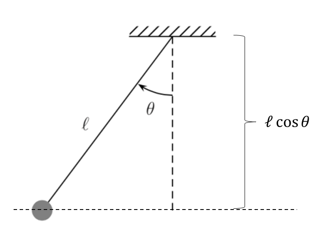

## Energia Cinética

$T = \dfrac{1}{2} m (l \dot \theta)^2$

## Energia Potencial

$U = mgl - mgl cos \theta = mgl(1- cos \theta)$

## Lagrangeana

$L = T - U$

## Equação de Euler-Lagrange

$\dfrac{d}{dt} \left( \dfrac{\partial L}{\partial \dot \theta} \right) - \dfrac{\partial L}{\partial \theta} = 0$

$m l^2 \ddot \theta + m g l sin(\theta) = 0$

$\ddot \theta + \dfrac{g}{l} sin(\theta) = 0$

## Equação geral

$\ddot \theta + b \dot \theta + a \sin \theta = 0$

$\begin{bmatrix} \dot{\theta} \\ \dot{\omega} \end{bmatrix} = \begin{bmatrix} \omega \\ -a \cdot \sin \theta -b \cdot \omega \end{bmatrix}$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
import pylab as pl

g = 9.81
l = 10

a = g/l
b = 0.5

def dx_dt(t, x):
  return [x[1], -a * np.sin(x[0]) -b*x[1]]


## Definição dos parâmetros de inicialização e das condições iniciaia de cada trajetória

In [2]:
# Inicialização
t0 = 0
tf = 50
ts = np.linspace(t0, tf, 500)

# condições iniciais das
ic_theta = np.linspace(-3/2*np.pi, 4*np.pi, 10)
ic_omega = np.linspace(-4, 4, 10)

## Solução do sistema para cada combinação de condições iniciais

In [3]:
trajetorias = []

for r in ic_theta:
  for s in ic_omega:
    x0 = [r, s]
    xs = solve_ivp(dx_dt, (t0, tf), x0, t_eval=ts)
    trajetorias.append(xs.y)

## Plot do diagrama de Fase

O campo de vetores representa a direção para o qual as trajetórias vão "caminhar" e é definido pela tangente das trajetórias

Uma trajetória $\psi_i(t)$ é definida pela pelos pontos $\psi_i(t) = [\theta (t), \omega(t)]$ e o campo de vetor tangente é dado pela primeira derivada:

$\vec{\tau} = \dfrac{d \psi_i(t)}{dt} = \dfrac{d}{dt} \left[\theta (t), \omega(t)\right]$

Ou seja:

$[u, v] = \left[\dot{\theta}(t), \dot{\omega}(t)\right] = \left[\omega(t), -a \cdot \sin(\theta(t) + b \cdot \omega (t)\right]$

### Observações:

Função ```np.meshgrid``` define uma grade de pontos para os quais os vetores serão plotados

Função ```plt.quiver``` plota o campo de vetores





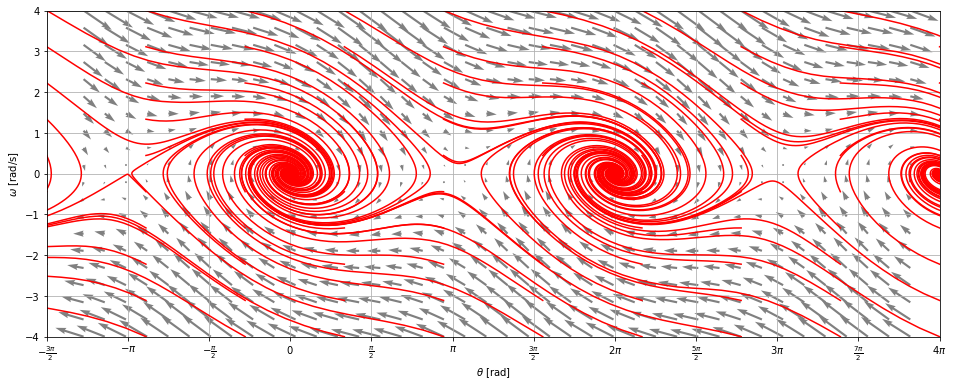

In [4]:
plt.figure(figsize=(16,6))

for traj in trajetorias:
  plt.plot(traj[0,:], traj[1,:], 'r-')

plt.xlim(-4, 12)
plt.ylim(-4, 4)


# Definição da grade de pontos
THETA_grid = np.linspace(-4,12,40)
OMEGA_grid = np.linspace(-4,4,20)
THETA, OMEGA = np.meshgrid(THETA_grid, OMEGA_grid)


# Campo de vetores
u = OMEGA
v = -a * np.sin(THETA) - b*OMEGA
plt.quiver(THETA, OMEGA, u, v, color = 'gray')

# configurações
plt.xlabel(r'$\theta$ [rad]')
plt.ylabel(r'$\omega$ [rad/s]')
plt.xticks(np.arange(-3/2*np.pi, 4*np.pi+.01, np.pi/2), [r'$-\frac{3\pi}{2}$',r'$-\pi$',r'$-\frac{\pi}{2}$',r'$0$',r'$\frac{\pi}{2}$',r'$\pi$',r'$\frac{3\pi}{2}$',r'$2\pi$',r'$\frac{5\pi}{2}$',r'$3\pi$',r'$\frac{7\pi}{2}$',r'$4\pi$'])
plt.grid()
plt.show()


# Extra: Animação dos resultados

In [6]:
theta0 = -3
thetap0 = 4

f_res = solve_ivp(dx_dt, (t0, tf), [theta0, thetap0], t_eval=ts)

x1 = f_res.y[0,:]
x2 = f_res.y[1,:]

O código a seguir é utilizado para gerar uma animação da simulação realizada.

* Se estiver rodando no colab precisa descomentar uma linha do código.
* Se estiver rodando local, precisa do FFMPEG instalado [https://ffmpeg.org/download.html](https://ffmpeg.org/download.html)

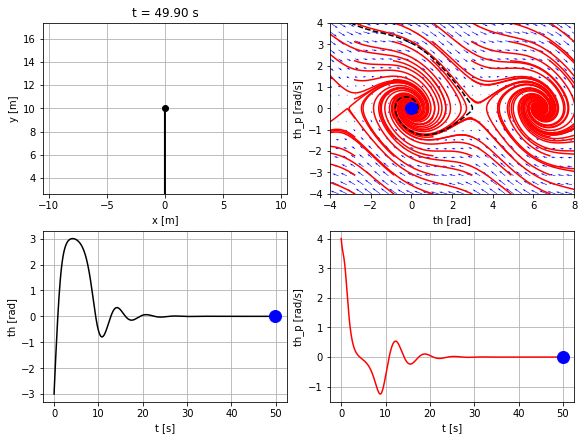

In [11]:
import matplotlib.animation as animation
from matplotlib import rc

  
fig = plt.figure(figsize=(8, 6), constrained_layout=True)


# Gráfico 1: Visualização do pêndulo
ax1 = plt.subplot(221)
    
line, = ax1.plot([], [], 'ko-', lw=2)
m1, = ax1.plot([], [], 'bo', markersize=12)

ax1.grid()
ax1.axis('equal')
ax1.set_xlim(-l*1.05, l*1.05)
ax1.set_ylim(-.05*l, 2.05*l)

texto = ax1.set_title("t = 0 s")
ax1.set_xlabel("x [m]")
ax1.set_ylabel("y [m]")


# Gráfico 2: Visualização do Diagrama de Fase
ax2 = plt.subplot(222)

for a in trajetorias:
  ax2.plot(a[0,:], a[1,:], 'r-')

ax2.plot(x1, x2, 'k--')
ax2.quiver(THETA, OMEGA, u, v, color = 'b')
m2, = ax2.plot([], [], 'bo', markersize=12)
ax2.set_xlabel("th [rad]")
ax2.set_ylabel("th_p [rad/s]")
ax2.set_xlim(-4, 8)
ax2.set_ylim(-4, 4)


# Gráfico 3: Posição versus tempo
ax3  = plt.subplot(223)

ax3.plot(ts, x1, 'k-')
m3, = ax3.plot([], [], 'bo', markersize=12)
ax3.grid()
ax3.set_xlabel("t [s]")
ax3.set_ylabel("th [rad]")


# Gráfico 4: Velocidade versus tempo
ax4  = plt.subplot(224)

ax4.plot(ts, x2, 'r-')
m4, = ax4.plot([], [], 'bo', markersize=12)
ax4.grid()
ax4.set_xlabel("t [s]")
ax4.set_ylabel("th_p [rad/s]")

        
def animacao(i):
    pos_x_m1 = l*np.sin(x1[i])
    pos_y_m1 = l*(1-np.cos(x1[i]))
    pos_x = [0, pos_x_m1]
    pos_y = [l, pos_y_m1]
    xx1 = [x1[i]]
    xx2 = [x2[i]]
    tt = [ts[i]]
    line.set_data(pos_x, pos_y)
    m1.set_data(pos_x_m1, pos_y_m1)
    m2.set_data(xx1, xx2)
    m3.set_data(tt, xx1)
    m4.set_data(tt, xx2)
    texto.set_text("t = {:.2f} s".format(ts[i]))
    
    return line, m1, m2, m3, m4, texto

duracao = tf

intervalo = (ts[1]-ts[0])*1000

n_frames = duracao / (intervalo / 1000)

n_frames

# somente se estiver rodando localmente (baixar o ffmpeg.exe e apontar o path)
plt.rcParams ['animation.ffmpeg_path'] = "C:\\ffmpeg-6.0-essentials_build\\bin\\ffmpeg.exe"

ani = animation.FuncAnimation(fig, animacao, frames = int(n_frames), interval = intervalo, blit=True)


# O comando abaixo deve ser utilizado apenas no Google Colab e VS Code pra gerar o arquivo .mp4
# O processamento deste comando pode demorar alguns minutos pra conclusão e geração do video
rc('animation', html='html5')

ani